In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline

In [74]:

url = r"C:\Users\xps\Desktop\SAMSUNG Innovation Camp Documentation\Third Checkpoint" 

In [75]:
# Read in the data.
df = pd.read_csv('titanic-passengers.csv', sep= ';')

In [76]:
#df.head()
df.iloc[::]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [77]:
#Pre-processing phase
#finding missing information and replacing it with the appropriate values.
#check columns with nan values
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [78]:
#fix Age col
mean_value=int(df.Age.mean())
print(mean_value)

first= df.Age.fillna(value= mean_value ,inplace=True)


29


In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,NaN,S


In [80]:
print(df['Age'].head(891).isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool


In [81]:
df.isnull().sum()  # Age fixed!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#Fixing Embarked col
vall= df.Embarked.mode()
df.Embarked.fillna(value= vall[0] ,inplace=True)

In [83]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,NaN,S


In [84]:
df.isnull().sum() #Embarked solved!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [85]:
#fixing Cabin col
val= df.Cabin.mode()
df.Cabin.fillna(value= val[0] ,inplace=True)

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.0,0,0,349215,7.8958,B96 B98,S


In [87]:
df.isnull().sum() #Cabin solved!

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [88]:
#Data visualizaion phase
#It is apparent from our dataset that the most important feature that provocked the surviving and non-surviving 
#of passengers is their Age. 
#we can also notice that female are less impacted and that will be further explored during the analysis of our dataset to see whether the gender plays an important role in distinguishing survived vs non-survived passengers.
#Also, by checking the fare of the tickets paid by passengers, we can notice that passengers who paid their tickets expensive
# were less impacted and hence they could survive. Paying tickets expensively is directly related to the Pclass chosen, so this makes Pclass fature also important.
#For the Cabin feature initially has 687 missing values out of 891 in total, the information we get from this colomn are not
#of great importance.
#The remaining features are to be analysed because they do not give an idea at a first sight inorder to judge whether they are of great impact until proved otherwise.

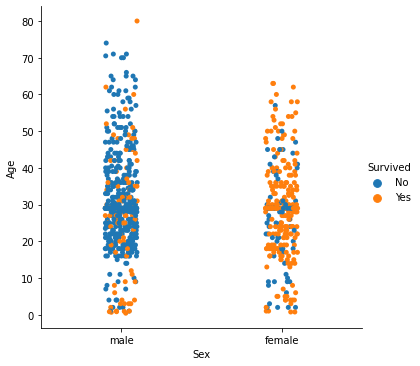

In [89]:
sns.catplot(x='Sex', y='Age', data=df, hue='Survived')

In [90]:
#We can notice that the sex of the passengers has quite an impressive role regarding the survived passengers. 
#Female passengers were the most non-affected and hence they could survive, only few of them who didnt survive compared to male; who few of them survived 
#and most of them could not survive

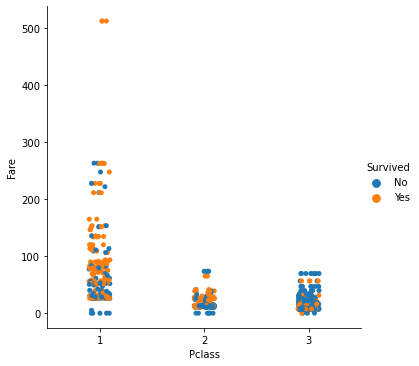

In [91]:

sns.catplot(x='Pclass', y='Fare', data=df, hue='Survived')


In [92]:
#Pclass and the Fare are also having a considerable impact on the survived passenegers. 
#We can notice that the first class was less affected compared to the remaining classes namely Pclass= 2 and Pclass=3.
#It can be noticed also that the cosltly the fare is, the less impacted were passengers in that Pclass, so Pclass = 3 was the one with 
#lots of non-survived passengers as it is the cheapest and less good compared to Pclass= 1 &2.

In [93]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

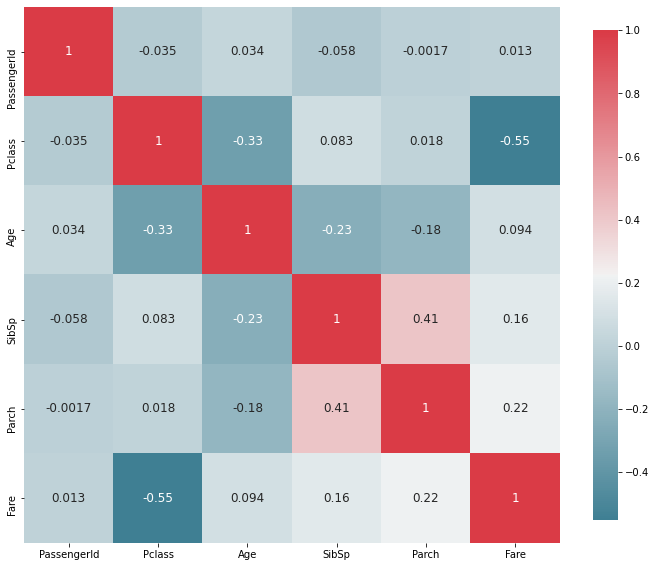

In [94]:
plot_correlation_map( df )

In [1]:
#This shows correlations between the stated importance of various features to survived passengers.
#The line of 1s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself.
#This matrix is symmetrical, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.
#we can notice that Fare and Pclass are negatively correlated with -0.55, which is the biggest highlighted correlation.
#Age is negatively correlated with Pclass feature with -0.33, with AbSp -0.23 and with Parch -0.18.
#A noticeable positive correlation is the one of Parch and SibSp with 0.41.
#Also, Parch and Fare have a positive correlation of 0.22 showing good correlation between these two features.
#Last but not least, SibSp and Fare have a considerable positive correlation of 0.16.
#Passengersid and Parch have the lowest correlation of -0.00017, followed by Fare with Passengers id with 0.013 and the rmaining
#features have very small correlations indicationg their low percentage of importance in this problem.

In [95]:
df.groupby(by=['Pclass', 'Survived']).agg({'Age': 'mean'})

Age
Pclass Survived           
1      No        40.756250
       Yes       34.712647
2      No        33.216495
       Yes       26.044023
3      No        27.225806
       Yes       23.032941

In [96]:
Name_col= df['Name']
Name_col

0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: object

In [97]:
for i, row in df.iterrows():
    Title= row["Name"].split(", ")[1]
    Title = Title.split(".")[0]
    df.at[i,"Title"]= Title
df['Title'].tolist()

['Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Dr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Major',
 'Mrs',
 'Don',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Dr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Master',
 'Miss',
 'Mr',
 'Rev',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Col',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',

In [98]:
df.drop("Name",axis=1, inplace= True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs
887,61,No,3,male,22.0,0,0,2669,7.2292,B96 B98,C,Mr
888,535,No,3,female,30.0,0,0,315084,8.6625,B96 B98,S,Miss
889,102,No,3,male,29.0,0,0,349215,7.8958,B96 B98,S,Mr


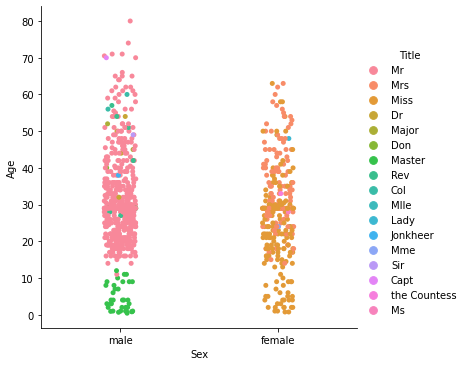

In [99]:
sns.catplot(x='Sex', y='Age', data= df, hue= 'Title')

In [100]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [101]:
#df[]=df['Title'].map(Title_Dictionary)  
df['Title_Dictionary'] = df['Title'].map(Title_Dictionary)
#df['Title'] = Title_Dictionary[Title]
#df['Title'] = df['Title'].map(Title_Dictionary)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Dictionary
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs


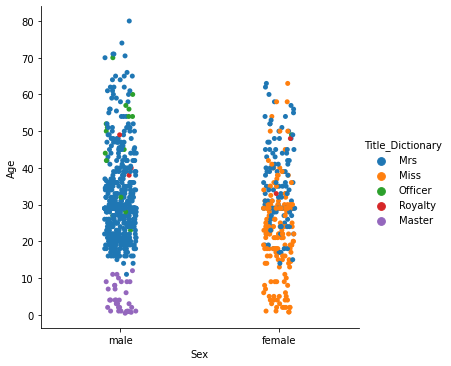

In [108]:
sns.catplot(x='Sex', y='Age', data= df, hue= 'Title_Dictionary')

In [103]:
df['FamilySize']= df['Parch']+ df['SibSp']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Dictionary,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,Mrs,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs,0
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,Mrs,0
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,Mrs,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs,Mrs,1
887,61,No,3,male,22.0,0,0,2669,7.2292,B96 B98,C,Mr,Mrs,0
888,535,No,3,female,30.0,0,0,315084,8.6625,B96 B98,S,Miss,Miss,0
889,102,No,3,male,29.0,0,0,349215,7.8958,B96 B98,S,Mr,Mrs,0


In [104]:
k= df['FamilySize'].to_numpy()
print(np.unique(k))


[ 0  1  2  3  4  5  6  7 10]


In [105]:
FamilySize_dictionary= {0:"zero" , 1:"one", 2: "two", 3:"three", 4:"four", 5:"five", 6:"six", 7:"seven", 10:"ten" }
df['FamilySize_dictionary'] = df['FamilySize'].map(FamilySize_dictionary)
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Dictionary,FamilySize,FamilySize_dictionary
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,Mrs,0,zero
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,Mrs,0,zero
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,Mrs,0,zero
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,Mrs,4,four
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,Mrs,1,one
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs,Mrs,1,one
887,61,No,3,male,22.0,0,0,2669,7.2292,B96 B98,C,Mr,Mrs,0,zero
888,535,No,3,female,30.0,0,0,315084,8.6625,B96 B98,S,Miss,Miss,0,zero
889,102,No,3,male,29.0,0,0,349215,7.8958,B96 B98,S,Mr,Mrs,0,zero


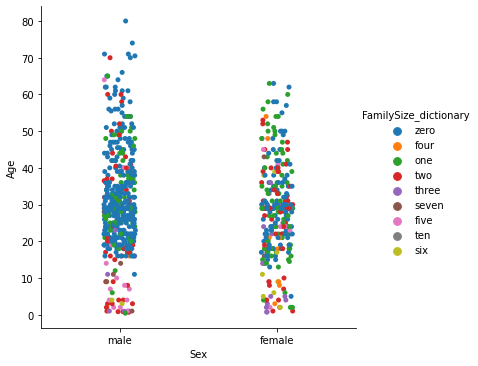

In [106]:
sns.catplot(x='Sex', y='Age', data= df, hue= 'FamilySize_dictionary')

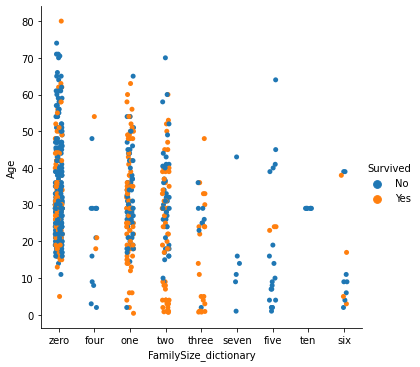

In [110]:
sns.catplot(x='FamilySize_dictionary', y='Age', data= df, hue= 'Survived')

In [107]:
#It can be noticed that FamilySize is of great importance in determining survived and non-survived passengers.
#We can notice that members who were not accompagnied with family, indicated by "zero" in the plot, were the most non-survived passengers.
#We can further notice that familysize greater than 3, meaning; a family with 4 up to 10 members were less likely to survive and hence they were the most impacted and had the fewest chance to survive.
#Families with 1,2 and 3 members were less impacted than the others and were more likely to survive.
#We can conclude that FamilySize feature is an important feature in distinguishing survived and non-survived passengers.